In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

---
---
---

# Base de dados

## Tweepy

In [ ]:
# Carregar client com Token cadastrada em https://developer.twitter.com
Bearer_Token = "Insira seu Token aqui"
client = tweepy.Client(Bearer_Token)
# query sobre o medicamento hidroxicloroquina
query = "hydroxychloroquine chloroquine HCQ -is:retweet"
# Busca os tweets dos ultimos 7 dias
tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at'], max_results=100)
# transforma em dataframe
df = pd.DataFrame(tweets.data).set_index('id'),
df.to_csv('COVID-CQ.csv') # armazeno em disco

## Base de dados anotada manualmente [Mutlu 2020]

In [9]:
"Downloads dos textos dos tweets"
"codigo faz download dos textos dos tweets e armazena em disco"
"base de dados em: https://github.com/eceveco/COVID-CQ/blob/master/COVID-CQ.csv"

# carregando ids do csv
df_stances = pd.read_csv('COVID-CQ.csv', names=['id', 'stance'], index_col='id')
ids = list(df_stances.index)
# quebrando o vetor de ids em consultas de tamanho 100.
chunks = [ids[x:x+100] for x in range(0, len(ids), 100)]

# faco as querys para cada chunk de ids
output = []
for query in chunks:
    tweets = client.get_tweets(query)
    for tweet in tweets.data:
        output.append({'id'            : tweet.id,
                       'text'          : tweet.text})
df_texts = pd.DataFrame(output)
df_texts.to_csv('COVID-CQ-texts.csv') #armazeno em disco

KeyboardInterrupt: 

In [7]:
# leitura dos tweets (textos e stance)
df_stances = pd.read_csv('COVID-CQ.csv', names=['id', 'stance'], index_col= 'id')
df_texts   = pd.read_csv('COVID-CQ-texts.csv', index_col='id')
df         = pd.DataFrame({'text': df_texts['text'], 'stance': df_stances['stance']}) # dataframe unico
df         = df.dropna()                                                              # removo tweets sem texto

# Viés dos tweets

## Análise de Sentimentos (Vader)
<https://www.nltk.org/_modules/nltk/sentiment/vader.html>

In [245]:
# aplicacao do vader nos tweets
sid = SentimentIntensityAnalyzer()
scores = df['text'].apply( lambda text : sid.polarity_scores(text) )
df['compound'] = scores.apply( lambda score_dict : score_dict['compound'] ) # esse é o valor que importa

## Viés anotado manualmente [Mutlu 2020]

In [245]:
# mudar stance de 0, 1, 2 para -1, 0, +1
df['stance'] = df['stance'].replace(1,-1)
df['stance'] = df['stance'].replace(2,1)'

# Polarização do grupo

In [521]:
# Separacao entre tweets positivos e negativos.
g  = df['compound']
gn = df[df['compound'] <= -0.05]['compound']
gp = df[df['compound'] >=  0.05]['compound']

In [521]:
# Calculos intermediarios
A   = g.count()       # num de tweets totais
An  = gn.count()/A    # populacao de tweets negativos
Ap  = gp.count()/A    # populacao de tweets positivos
A0  = A - An - Ap     # populacao de tweets neutros
Sn  = abs(gn.sum())   # soma dos valores de sentimento negativo
Sp  = gp.sum()        # soma dos valores de sentimento positivo
gcp = gp.mean()       # centroide dos tweets positivos
gcn = gn.mean()       # centroide dos tweets negativos

# Metricas de [Al-Ayyoub 2018]
PN    = Ap / An                   # metrica PN
RPN   = min(An, Ap) / max(An, Ap) # metrica RPN
NPN   = A0 / (An + Ap)            # metrica NPN
PNT   = (Ap + An) / A             # metrica PNT
PNPNT = PN * PNT                  # metrica PNPNT
RPNV  = min(Sn, Sp) / max(Sn, Sp) # metrica RPNV

# Metrica de [Morales 2015]
dA = abs(Ap - An) / A # diferenca do tamanho das populacoes
d  = (gcp - gcn) /2   # distancia entre centroides
m  = (1 - dA) * d     # metrica do dipolo eletrico

In [ ]:
# Para utilizar os dados anotados manualmente [Mutlu 2020]
g  = df['stance']
gn = df[df['stance'] < 0]['stance']
gp = df[df['stance'] >  0]['stance']

# Análise da polarização

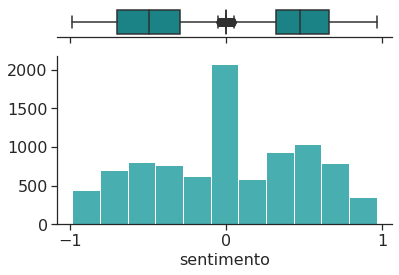

In [1022]:
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=gn, ax=ax_box)
sns.boxplot(x=gp, ax=ax_box)
sns.boxplot(x=g0, ax=ax_box)
sns.histplot(g, ax=ax_hist, bins=11)

In [11]:
print('PN:    ', PN)
print('RPN:   ', RPN)
print('NPN:   ', NPN)
print('PNT:   ', PNT)
print('PNPNT: ', PNPNT)
print('RPNV:  ', RPNV)
print('M:     ', m)

NameError: name 'An' is not defined